In [ ]:
# DATA 221 
# Soft-margin search for line discriminating between
# handful of scattered points in 2d.

# Optimization isn't so bad..

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

(1000, 2)

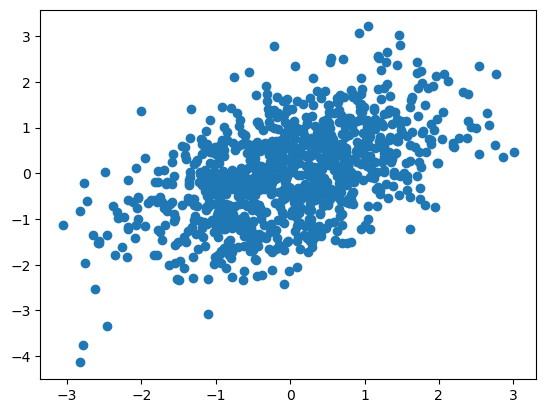

In [2]:
r = 0.5
#You can generate n identical multivariate normals 
# with this funciton, but can't generate n different
# MVNs at once.
a = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=1000)
plt.plot(a[:,0], a[:,1], 'o')
a.shape

In [3]:
means_1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means_2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [4]:
np.ones((10,2)) * [0,1]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [5]:
n_clusters = 10
finescale = 0.2
distance = 3
clusters_1 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [0,distance])  
clusters_2 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [distance,0])


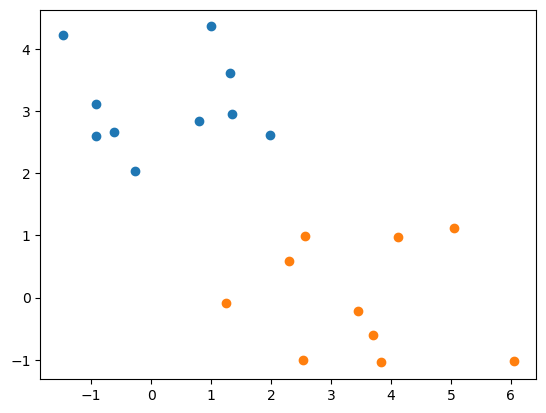

In [6]:
plt.plot(clusters_1[:,0], clusters_1[:,1], 'o')
plt.plot(clusters_2[:,0], clusters_2[:,1], 'o')
plt.savefig("SEPARABLE.png", dpi=300, bbox_inches="tight")

In [7]:
X = np.vstack([clusters_1, clusters_2])
Y = np.vstack([np.ones((10,1)), np.ones((10,1))*0])

In [8]:
X.shape, Y.shape, Y

((20, 2),
 (20, 1),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [126]:
def loss_acc(b): 
    b0 = b[0]
    b1 = b[1] 
    Ypred = np.array(((-b0 + b1 * X[:,0] + 1* X[:,1]) > 0 ))[:,np.newaxis]
#    print(Ypred.shape,Y.shape)
#    print(len(Ypred))
# Return number of errors.
    return(len(Y)-np.sum(Ypred == Y))


In [127]:
loss_acc([0, 1]), loss_acc([3, 1]), loss_acc([-3, 1])

(11, 13, 10)

In [128]:
xgrid = np.linspace(-10,10,110) # range for flipper length
ygrid = np.linspace(-10,10,100)  # range for beak length

def grideval(func):
    xgrid = np.linspace(-10,10,110) # range for flipper length
    ygrid = np.linspace(-10,10,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z = np.zeros(xax.shape)
    print("xax.shape", "yax.shape", "z.shape")
    print(xax.shape, yax.shape, z.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z[i,j]= func(x)
    return(z, xax, yax)

In [129]:
z, xax, yax=grideval(loss_acc)
z.shape

xax.shape yax.shape z.shape
(110, 100) (110, 100) (110, 100)


(110, 100)

In [ ]:
z

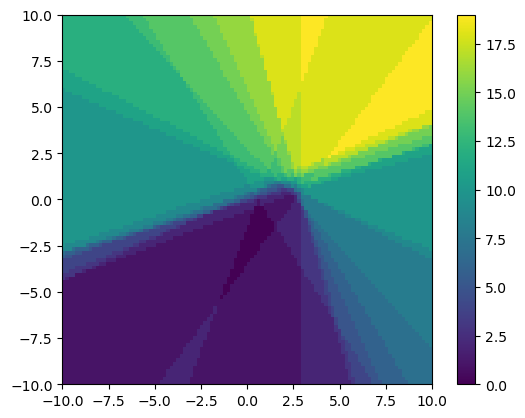

In [130]:
plt.imshow( z.T, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower")
plt.colorbar()

In [ ]:
# This "classification accuracy" function
# is going to be hard to optimize using gradient descent.

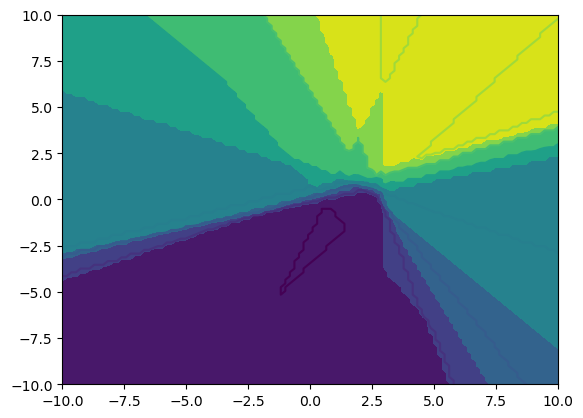

In [131]:
CS = plt.contourf(xax, yax, z) # , levels=[0, 0.25, 0.5, 0.75, 1.0], cmap="seismic")
CS = plt.contour(xax, yax, z, levels=6) 

#plt.colorbar(cmap="seismic")
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

In [ ]:
loss_acc([-2, -3]), loss_acc([-2, 1])

In [132]:
def logistic(z1):
    z1 = np.minimum(np.maximum(z1, -50), 50)
    return(1/ (1+np.exp(-z1)))

In [133]:
def loss_ssq(b): 
    b0 = b[0]
    b1 = b[1] 
    Ypred = np.array(-b0 + b1 * X[:,0] + 1* X[:,1])[:,np.newaxis]
#    print(Ypred.shape,Y.shape)
#    print(len(Ypred))
    total = (Y-Ypred)**2
    #print(Y, Ypred)
    return(np.sum(total))

In [134]:
# x_ssq is sum-squared-loss function
z_ssq,xax, yax = grideval(loss_ssq)

xax.shape yax.shape z.shape
(110, 100) (110, 100) (110, 100)


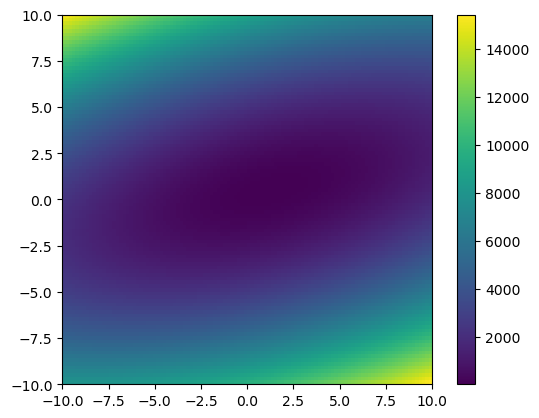

In [135]:
plt.imshow( z_ssq.T, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower")
plt.colorbar()

In [ ]:
plt.contour(xax, yax, z_ssq)

In [136]:
def loss_log(b): 
    b0 = b[0]
    b1 = b[1] 
    z = np.array(-b0 + b1 * X[:,0] + 1* X[:,1])[:,np.newaxis]
#    print(Ypred.shape,Y.shape)
    total = (1-Y)* np.log(logistic(z)) +Y*np.log(1-logistic(z))
    if np.isnan(total.sum()): return(np.inf)
    #print(Y, Ypred)
    return(-np.sum(total))

In [137]:
z3,xax, yax = grideval(loss_log)

xax.shape yax.shape z.shape
(110, 100) (110, 100) (110, 100)


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_41722/3130304107.py:6: RuntimeWarning: divide by zero encountered in log
  total = (1-Y)* np.log(logistic(z)) +Y*np.log(1-logistic(z))
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_41722/3130304107.py:6: RuntimeWarning: invalid value encountered in multiply
  total = (1-Y)* np.log(logistic(z)) +Y*np.log(1-logistic(z))


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_41722/2576729927.py:2: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(z3, levels=50,extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower", color="black")


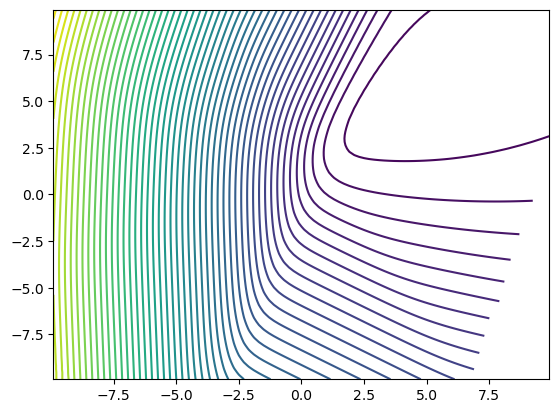

In [138]:
#plt.imshow(z3, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower")
plt.contour(z3, levels=50,extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower", color="black")

62 52 1.3761467889908268 0.5050505050505052


Text(0.5, 1.0, 'The sum-squared-error line')

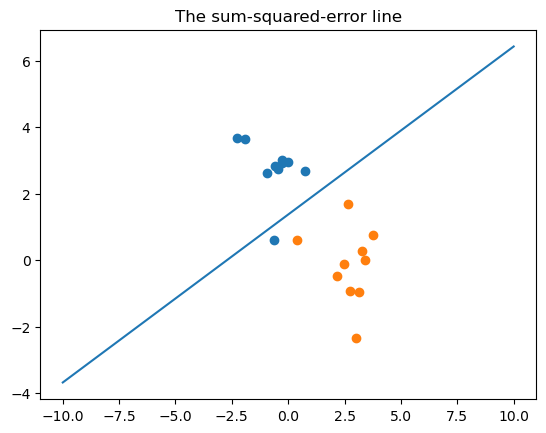

In [139]:

xfine= np.linspace(xgrid[0], xgrid[-1], 20)
plt.scatter(clusters_1[:,0], clusters_1[:,1])
plt.scatter(clusters_2[:,0], clusters_2[:,1])
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        b0 = xgrid[i]; b1=ygrid[j]
#        print(b0,b1, z2[i,j])
        yfine = b0 + b1 * xfine
        if z_ssq[i,j]== np.min(z_ssq):
            plt.plot(xfine, yfine)
            print(i,j, b0, b1)
plt.title("The sum-squared-error line")

(-4.0, 4.0)

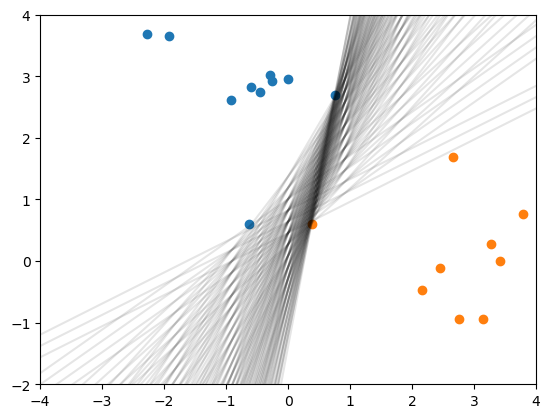

In [141]:
xfine= np.linspace(xgrid[0], xgrid[-1], 20)

for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        b0 = xgrid[i]; b1=ygrid[j]
#        print(b0,b1, z2[i,j])
        yfine =  +b0 - b1 * xfine  
        if z[i,j]== np.min(z):
            plt.plot(xfine, yfine, color="black", alpha=0.1)
            #print(i, j, b0, b1)
   #     if np.abs(z[i,j]- np.max(z)) < .01:
   #         plt.plot(xfine, yfine, color="red", alpha=0.01)

plt.scatter(clusters_1[:,0], clusters_1[:,1])
plt.scatter(clusters_2[:,0], clusters_2[:,1])
plt.ylim(-2,4)
plt.xlim(-4,4)

In [ ]:
(z == np.min(z)).sum()

In [ ]:
np.max(z), np.min(z)


In [ ]:
np.sum(z==np.max(z))

In [ ]:
z.shape

In [ ]:
np.sum(z==np.min(z))

In [ ]:
loss_log([1,1]), loss_log([2,2]), loss_log([3,3]), loss_log([4,4])

In [ ]:
from scipy.optimize import minimize
fit = minimize(loss_log, [0,0]) 
fit

In [ ]:
fit = minimize(loss_log, [0,0], method="CG") 
fit

In [ ]:

yfit = -fit.x[0] + fit.x[1] * xfine


In [ ]:
plt.plot(xfine, yfit, color="black")
plt.scatter(clusters_1[:,0], clusters_1[:,1])
plt.scatter(clusters_2[:,0], clusters_2[:,1])
plt.xlim(-5,5)
plt.ylim(-5,5)